In [1]:
import os
os.environ['KAGGLE_USERNAME'] = 'bluebear78'
os.environ['KAGGLE_KEY'] = '39d305f791ce074d3a7f8d5630fecba2'
!rm '*.*'
!kaggle datasets download -d bobbyscience/league-of-legends-diamond-ranked-games-10-min
!unzip "*.zip"

rm: cannot remove '*.*': No such file or directory
  0% 0.00/539k [00:00<?, ?B/s]
100% 539k/539k [00:00<00:00, 106MB/s]
Archive:  league-of-legends-diamond-ranked-games-10-min.zip
  inflating: high_diamond_ranked_10min.csv  


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("./high_diamond_ranked_10min.csv")

In [4]:
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [5]:
df.isna().sum()

gameId                          0
blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
redWardsPlaced                  0
redWardsDestroyed               0
redFirstBlood                   0
redKills                        0
redDeaths                       0
redAssists                      0
redEliteMonsters                0
redDragons                      0
redHeralds    

In [6]:
df.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

In [7]:
df.drop(['gameId','redFirstBlood', 'redKills', 'redDeaths', 'redGoldDiff','redExperienceDiff'],axis=1,inplace=True)

굉장히 균등한 데이터이다,

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   blueWins                      9879 non-null   int64  
 1   blueWardsPlaced               9879 non-null   int64  
 2   blueWardsDestroyed            9879 non-null   int64  
 3   blueFirstBlood                9879 non-null   int64  
 4   blueKills                     9879 non-null   int64  
 5   blueDeaths                    9879 non-null   int64  
 6   blueAssists                   9879 non-null   int64  
 7   blueEliteMonsters             9879 non-null   int64  
 8   blueDragons                   9879 non-null   int64  
 9   blueHeralds                   9879 non-null   int64  
 10  blueTowersDestroyed           9879 non-null   int64  
 11  blueTotalGold                 9879 non-null   int64  
 12  blueAvgLevel                  9879 non-null   float64
 13  blu

In [9]:
df.columns

Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters',
       'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold',
       'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redAssists', 'redEliteMonsters', 'redDragons', 'redHeralds',
       'redTowersDestroyed', 'redTotalGold', 'redAvgLevel',
       'redTotalExperience', 'redTotalMinionsKilled',
       'redTotalJungleMinionsKilled', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

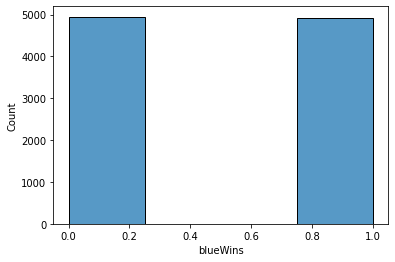

In [10]:
sns.histplot(x='blueWins',data=df,bins=4)

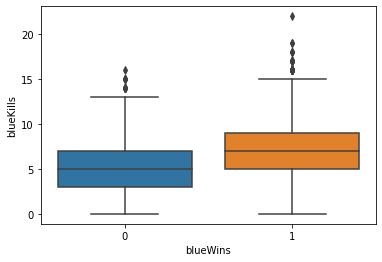

In [11]:
sns.boxplot(x='blueWins',y='blueKills',data=df)

패배시 확실히 킬수가 적음, 근데 이겼을때 outlier가 존재함

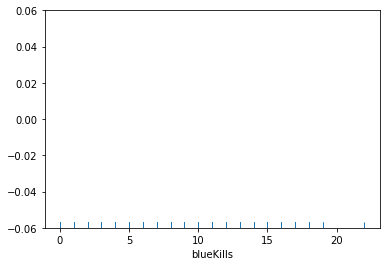

In [12]:
sns.rugplot(x='blueKills',data=df)

In [14]:
bk = df['blueKills'].quantile(0.99)
bk

14.0

In [15]:
df = df[df['blueKills']<bk]

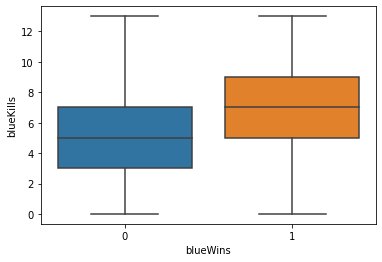

In [16]:
sns.boxplot(x='blueWins',y='blueKills',data=df)

outlier를 제거해주었음

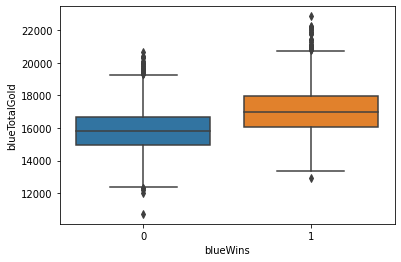

In [19]:
sns.boxplot(x='blueWins', y='blueTotalGold',data=df)

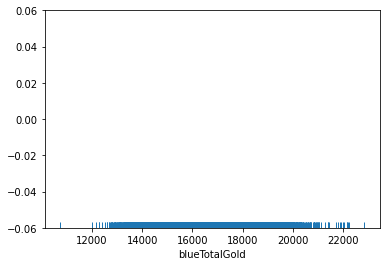

In [20]:
sns.rugplot(x='blueTotalGold',data=df)

In [21]:
bg = df['blueTotalGold'].quantile(0.99)
bg

20060.319999999996

In [22]:
df = df[df['blueTotalGold']<bg]
df

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redCSPerMin,redGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,...,0,0,0,16567,6.8,17047,197,55,19.7,1656.7
1,0,12,1,0,5,5,5,0,0,0,...,1,1,1,17620,6.8,17438,240,52,24.0,1762.0
2,0,15,0,0,7,11,4,1,1,0,...,0,0,0,17285,6.8,17254,203,28,20.3,1728.5
3,0,43,1,0,4,5,5,1,0,1,...,0,0,0,16478,7.0,17961,235,47,23.5,1647.8
4,0,75,4,0,6,6,6,0,0,0,...,1,0,0,17404,7.0,18313,225,67,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,1,17,2,1,7,4,5,1,1,0,...,0,0,0,15246,6.8,16498,229,34,22.9,1524.6
9875,1,54,0,0,6,4,8,1,1,0,...,0,0,0,15456,7.0,18367,206,56,20.6,1545.6
9876,0,23,1,0,6,7,5,0,0,0,...,1,0,0,18319,7.4,19909,261,60,26.1,1831.9
9877,0,14,4,1,2,3,3,1,1,0,...,0,0,0,15298,7.2,18314,247,40,24.7,1529.8


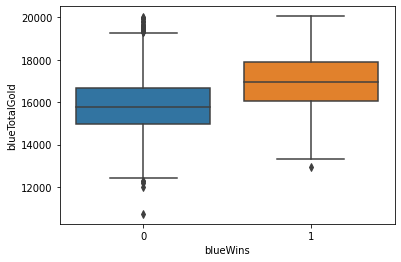

In [23]:
sns.boxplot(x='blueWins', y='blueTotalGold',data=df)

확실히 얘도 관련성이 높아보인다.

In [24]:
df.columns

Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters',
       'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold',
       'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redAssists', 'redEliteMonsters', 'redDragons', 'redHeralds',
       'redTowersDestroyed', 'redTotalGold', 'redAvgLevel',
       'redTotalExperience', 'redTotalMinionsKilled',
       'redTotalJungleMinionsKilled', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

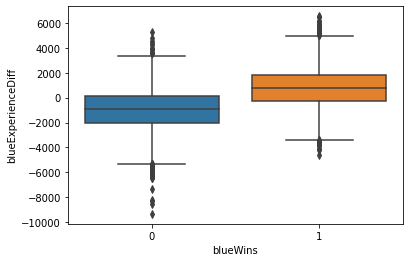

In [25]:
sns.boxplot(x='blueWins', y='blueExperienceDiff',data=df)

얘는 아랫쪽에 outlier가 존재

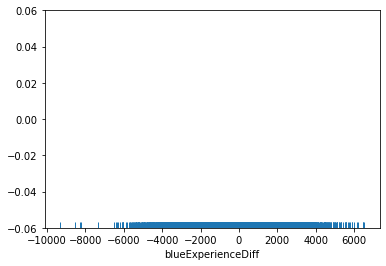

In [26]:
sns.rugplot(x='blueExperienceDiff',data=df)

In [27]:
bg = df['blueExperienceDiff'].quantile(0.001)
bg

-6152.224

In [28]:
df = df[df['blueExperienceDiff']>bg]

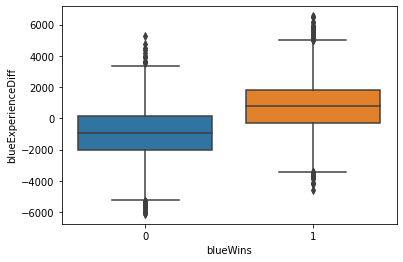

In [29]:
sns.boxplot(x='blueWins', y='blueExperienceDiff',data=df)

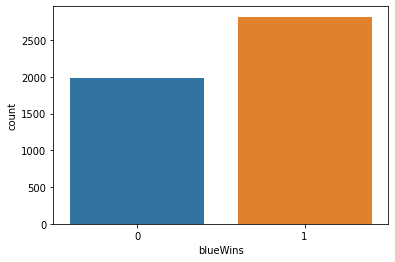

In [30]:
sns.countplot(x='blueWins',data=df[df['blueFirstBlood']==1])

첫킬을 땃을때, 승패 상관관계, 확실히 있어보이긴 함

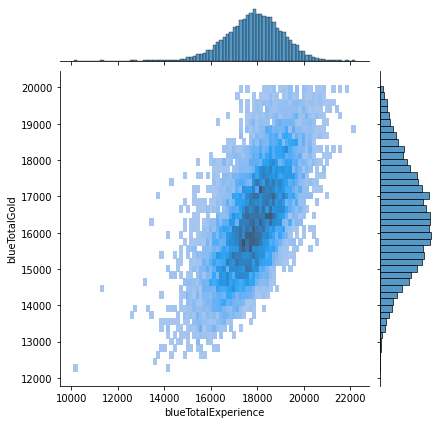

In [31]:
sns.jointplot(x='blueTotalExperience',y='blueTotalGold',data=df,kind='hist')

gold와 experience는 관계가 높을 수 밖에없음 둘중하나를 drop하는 방향으로 가는게 맞아보임

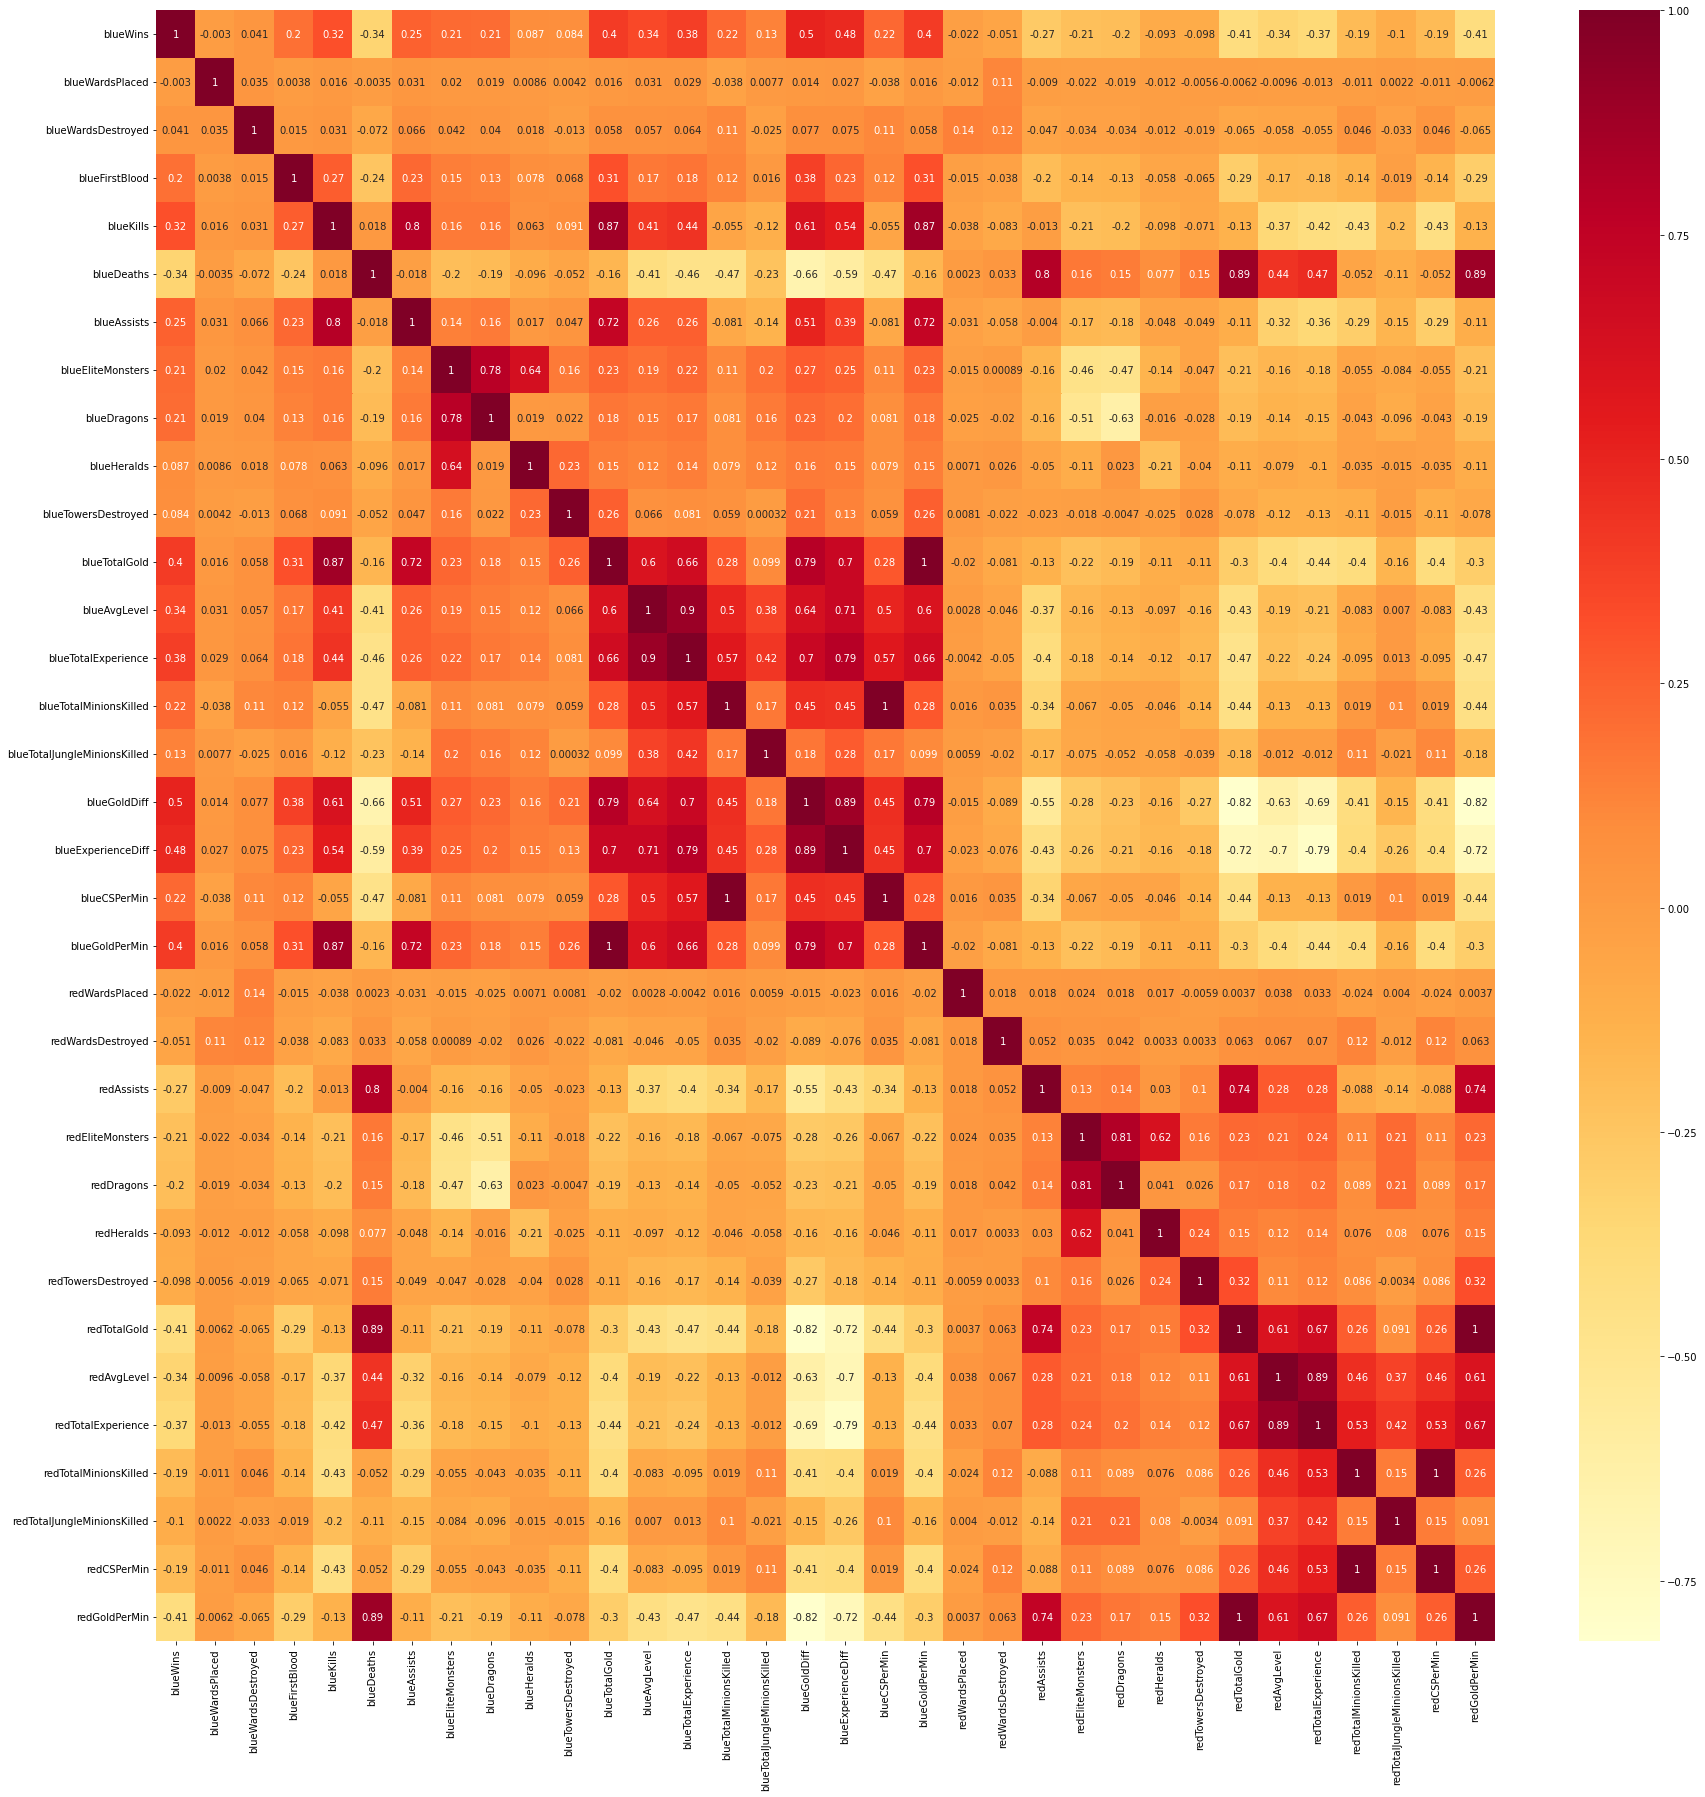

In [32]:
fig = plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True,cmap='YlOrRd')

1. BlueDeaths와 redGoldperMin의 연관성이 매우 높았다. >> 적팀이 잘죽어주면 당연히 분당 골드가 오른다
2. redDeaths와 blueGoldperMin의 연관성이 매우 높았다. >> 적팀이 잘죽어주면 당연히 분당 골드가 오른다 // 
3. totalGold series와도 연관성이 매우 높다. // 3개중 하나의 feature만 사용하면 충분할듯 하다.
4. corr이 가장 큰 blueTotalGold, RedTotalGold만 남기겠다.
5. 마찬가지로 differ와의 관계때문에 total시리즈는 다 지워버림 ( 롤은 상대적인 게임이라 diff가 더 크게 작용할거라 판단)

In [33]:
df.columns

Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters',
       'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold',
       'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redAssists', 'redEliteMonsters', 'redDragons', 'redHeralds',
       'redTowersDestroyed', 'redTotalGold', 'redAvgLevel',
       'redTotalExperience', 'redTotalMinionsKilled',
       'redTotalJungleMinionsKilled', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

In [34]:
df.drop(['blueDeaths','blueGoldPerMin','blueTotalGold','redGoldPerMin','redTotalGold','redTotalExperience','blueTotalExperience'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [35]:
df

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,...,redWardsDestroyed,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redAvgLevel,redTotalMinionsKilled,redTotalJungleMinionsKilled,redCSPerMin
0,0,28,2,1,9,11,0,0,0,0,...,6,8,0,0,0,0,6.8,197,55,19.7
1,0,12,1,0,5,5,0,0,0,0,...,1,2,2,1,1,1,6.8,240,52,24.0
2,0,15,0,0,7,4,1,1,0,0,...,3,14,0,0,0,0,6.8,203,28,20.3
3,0,43,1,0,4,5,1,0,1,0,...,2,10,0,0,0,0,7.0,235,47,23.5
4,0,75,4,0,6,6,0,0,0,0,...,2,7,1,1,0,0,7.0,225,67,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,1,17,2,1,7,5,1,1,0,0,...,3,7,0,0,0,0,6.8,229,34,22.9
9875,1,54,0,0,6,8,1,1,0,0,...,21,3,0,0,0,0,7.0,206,56,20.6
9876,0,23,1,0,6,5,0,0,0,0,...,0,11,1,1,0,0,7.4,261,60,26.1
9877,0,14,4,1,2,3,1,1,0,0,...,4,1,0,0,0,0,7.2,247,40,24.7


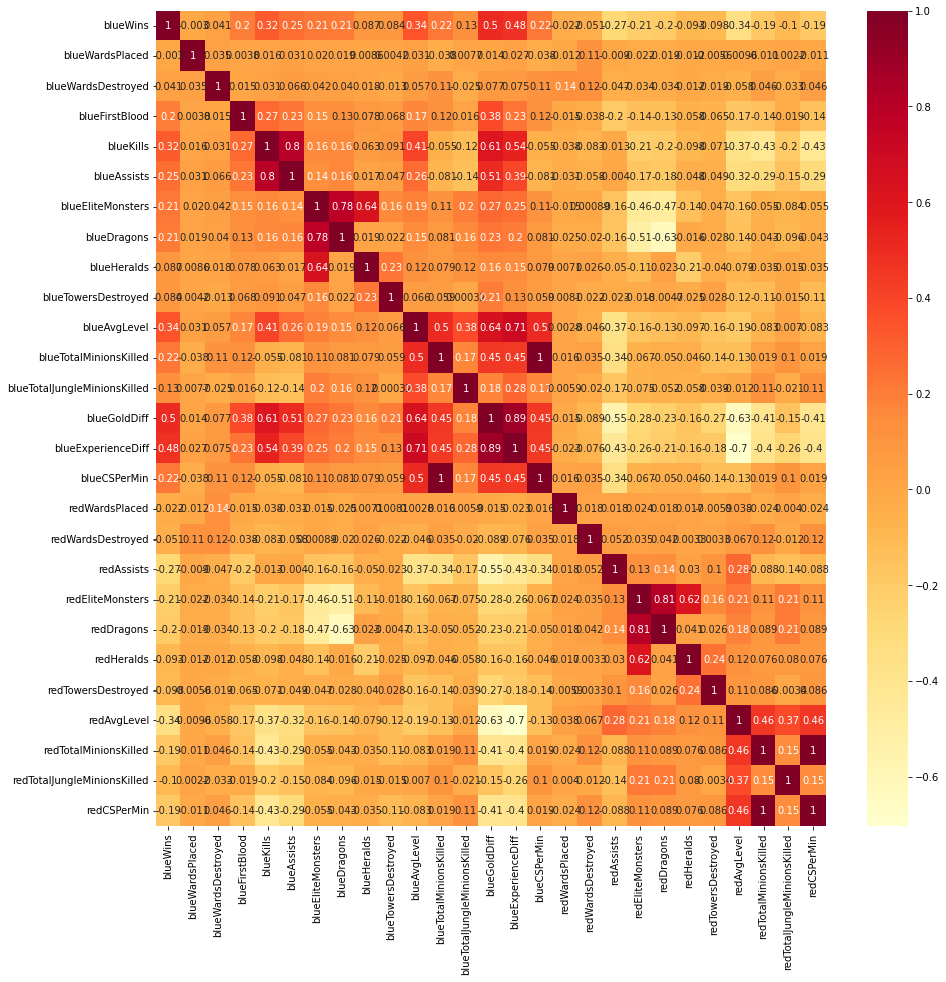

In [36]:
fig = plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap='YlOrRd')

In [37]:
df.columns

Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueAssists', 'blueEliteMonsters', 'blueDragons',
       'blueHeralds', 'blueTowersDestroyed', 'blueAvgLevel',
       'blueTotalMinionsKilled', 'blueTotalJungleMinionsKilled',
       'blueGoldDiff', 'blueExperienceDiff', 'blueCSPerMin', 'redWardsPlaced',
       'redWardsDestroyed', 'redAssists', 'redEliteMonsters', 'redDragons',
       'redHeralds', 'redTowersDestroyed', 'redAvgLevel',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redCSPerMin'],
      dtype='object')

In [38]:
df.drop(['blueAssists','blueTotalJungleMinionsKilled','blueTotalMinionsKilled','redAssists','redTotalJungleMinionsKilled'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


킬과 어시도 관련이 높으므로 assist도 날려버리고, cs안에 크립을 잡는게 포함되므로 크립관려된 feature도 날려버린다

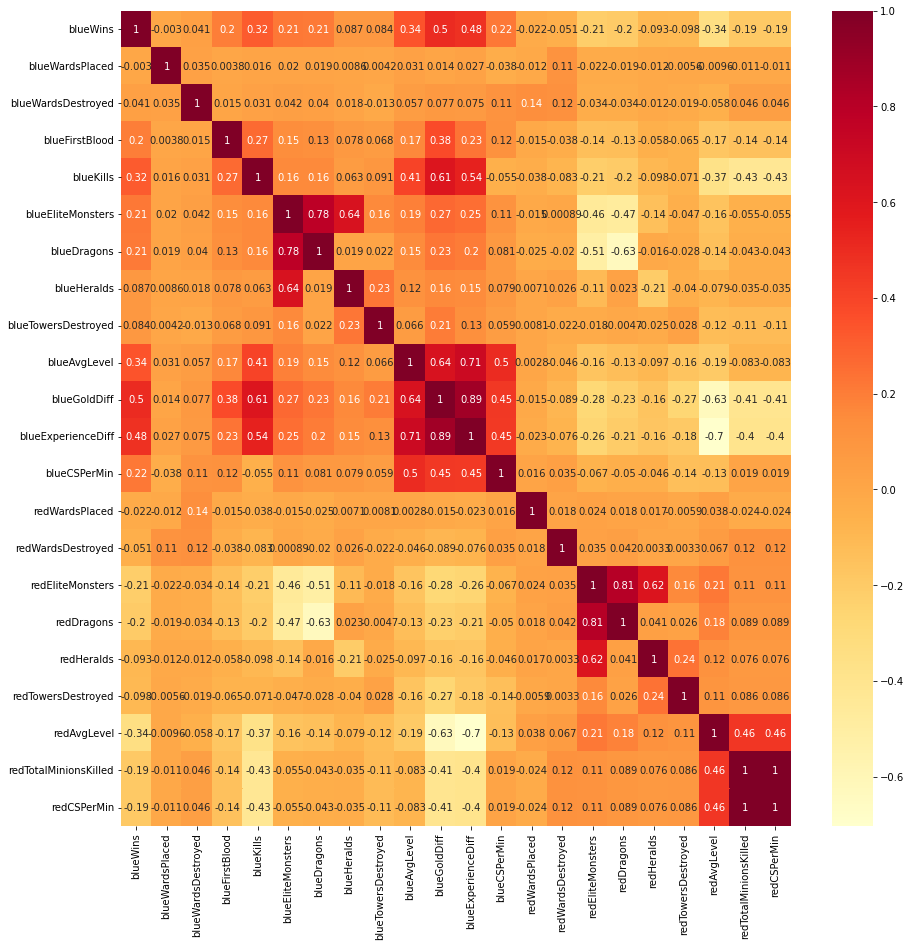

In [39]:
fig = plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap='YlOrRd')

In [40]:
df.columns

Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueAvgLevel', 'blueGoldDiff',
       'blueExperienceDiff', 'blueCSPerMin', 'redWardsPlaced',
       'redWardsDestroyed', 'redEliteMonsters', 'redDragons', 'redHeralds',
       'redTowersDestroyed', 'redAvgLevel', 'redTotalMinionsKilled',
       'redCSPerMin'],
      dtype='object')

In [41]:
df.drop(['redTotalMinionsKilled','redDragons','redWardsDestroyed','redWardsPlaced','blueExperienceDiff'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


마지막으로 서로 관련있는 데이터중 충분히 합리적으로 날려도 될거같은 feature를 drop해준다

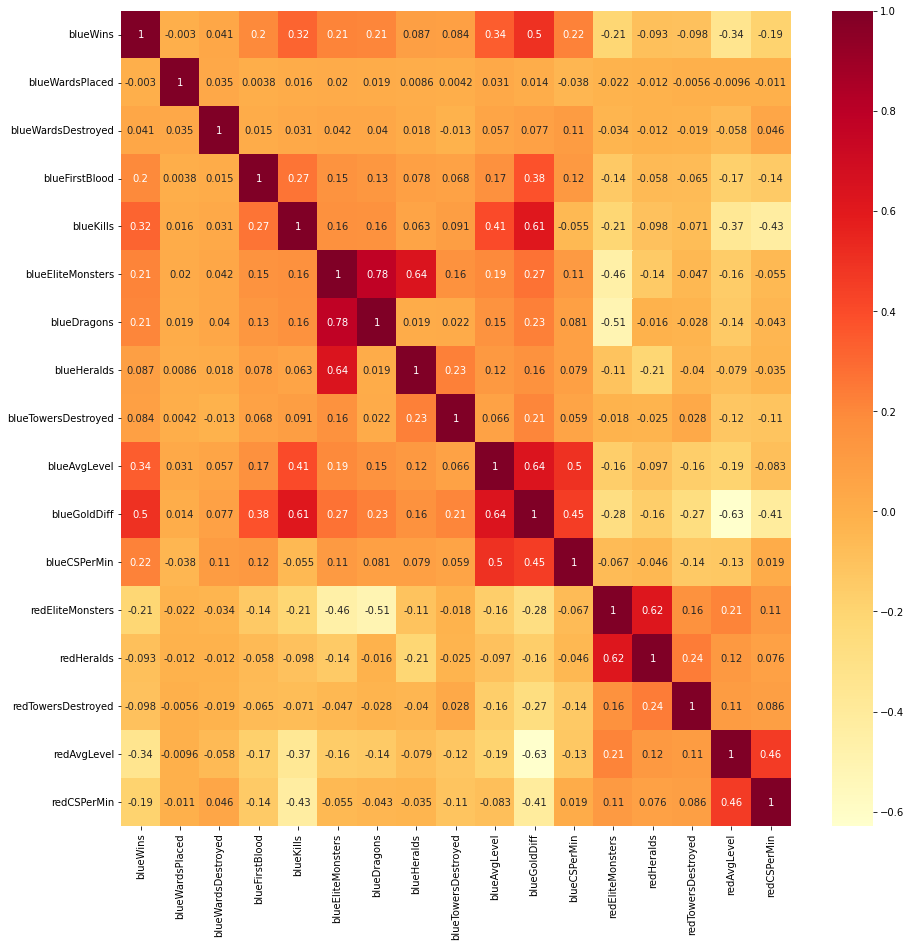

In [42]:
fig = plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap='YlOrRd')

In [43]:
df.drop(['blueDragons'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


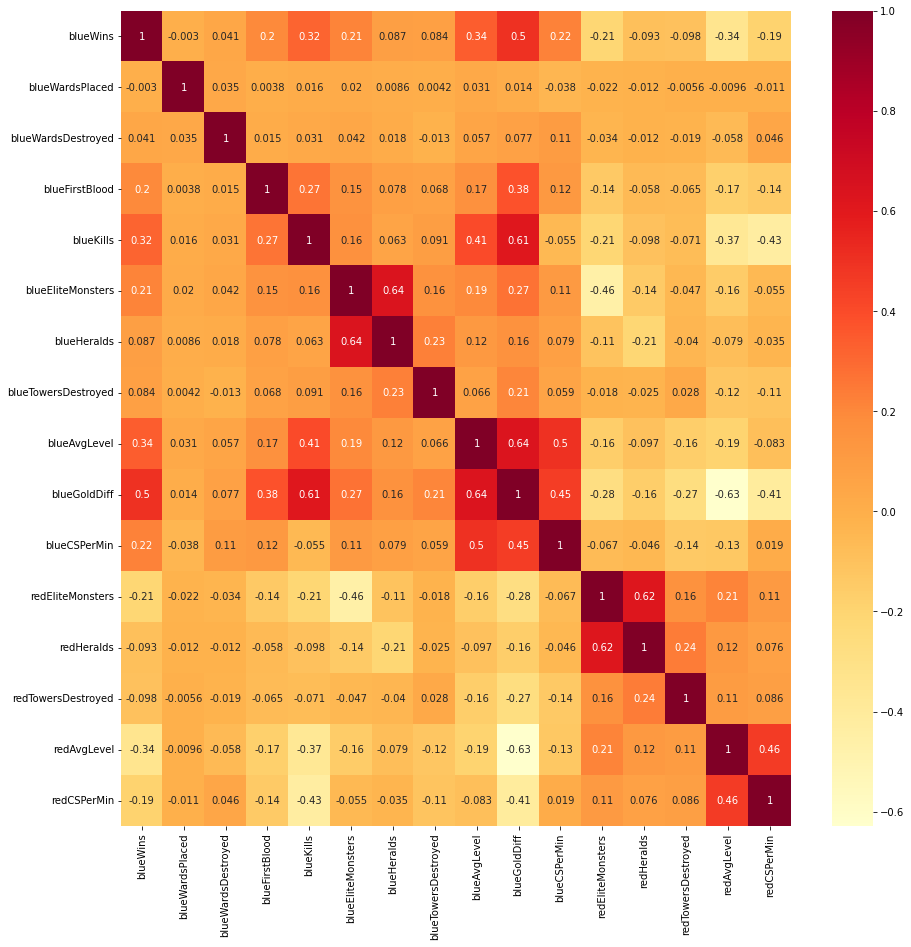

In [44]:
fig = plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap='YlOrRd')

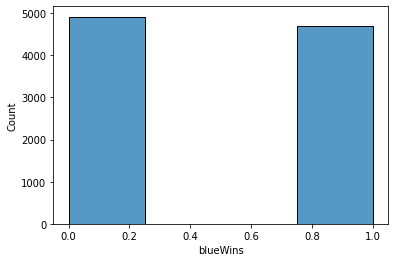

In [45]:
sns.histplot(x='blueWins',data=df,bins=4)

어느정도 균등한 데이터라고 볼 수 있음

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [47]:
X_num = df

In [48]:
sclaer = StandardScaler()
sclaer.fit(X_num)

StandardScaler()

In [49]:
X_scaled  = sclaer.transform(X_num)
X_scaled = pd.DataFrame(X_scaled,index=X_num.index,columns=X_num.columns)

In [50]:
X  = X_scaled
y = df['blueWins']

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [52]:
from xgboost import XGBClassifier

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train,y_train)

XGBClassifier()

In [55]:
model_lr = LogisticRegression()
model_lr.fit(X_train,y_train)

LogisticRegression()

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [57]:
pred_xgb = model_xgb.predict(X_test)
pred_lr = model_lr.predict(X_test)

In [58]:
model_xgb.score(X_test,y_test)

1.0

In [59]:
model_lr.score(X_test,y_test)

1.0

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(X_train, y_train)

Y_pred = random_forest.predict(X_test)

random_forest.score(X_test, y_test)

1.0

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [65]:
# check VIF of data
new_data = df.drop(['blueWins'], axis=1, inplace=False)


vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(new_data.values, i) for i in range(new_data.shape[1])]
vif['features'] = new_data.columns
vif

,VIF Factor,features
0,2.551448,blueWardsPlaced
1,2.747173,blueWardsDestroyed
2,2.420507,blueFirstBlood
3,13.561000,blueKills
4,5.039107,blueEliteMonsters
5,2.816376,blueHeralds
6,1.157540,blueTowersDestroyed
7,850.926815,blueAvgLevel
8,5.749502,blueGoldDiff
9,196.971725,blueCSPerMin
